In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
base_path = kagglehub.dataset_download('fedesoriano/the-boston-houseprice-data')

# Find the CSV file in the directory
csv_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

if csv_files:
    # Use the first CSV file found
    data = pd.read_csv(csv_files[0], delimiter=',', nrows=None)
    print("Data loaded successfully:")
    print(data)
else:
    print(f"No CSV files found in {base_path}")
    print("Available files:", os.listdir(base_path))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data loaded successfully:
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1

In [9]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Display the count of null values for each column
print("\nNull value counts for each column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (null_counts / len(data)) * 100

print("\nPercentage of null values for each column:")
print(null_percentages)

# Check if there are any null values in the entire dataset
if data.isnull().values.any():
    print("\nWarning: Dataset contains null values")
else:
    print("\nNo null values found in the dataset")



Null value counts for each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Percentage of null values for each column:
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

No null values found in the dataset


CRIM
per capita crime rate by town
-Needs to be normalized

ZN
proportion of residential land zoned for lots over 25,000 sq.ft.
- Needs to be converted to ranges (0-1, 1-10, 10-25, 25-50, 50-100) (372 are from 0-10)

INDUS
proportion of non-retail business acres per town
- Needs to be normalized

CHAS
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 

NOX
nitric oxides concentration (parts per 10 million)
- Needs to be normalized

RM
average number of rooms per dwelling 
(intutively, more rooms means more space, more expensive)
- Needs to be normalized

AGE
proportion of owner-occupied units built prior to 1940
- Needs to be normalized

DIS
weighted distances to five Boston employment centres
- Needs to be normalized

RAD
index of accessibility to radial highways
- Needs to be normalized

TAX
full-value property-tax rate per $10,000
- Needs to be normalized

PTRATIO
pupil-teacher ratio by town
- Needs to be normalized

B
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- Needs to be normalized

LSTAT
% lower status of the population
- Needs to be normalized

MEDV
Median value of owner-occupied homes in $1000's
- Desired output


In [10]:
# Normalization
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the data
data_normalized = data.copy()

# List of features to normalize (excluding CHAS and MEDV)
features_to_normalize = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
                        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the selected features
data_normalized[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Print sample of normalized data
print("Sample of normalized data:")
print(data_normalized.head())

# Verify the normalization by checking min and max values
print("\nMin and max values of normalized features:")
print(data_normalized[features_to_normalize].agg(['min', 'max']).round(3))

# Store the scaler for later use (important for test data or predictions)
import pickle
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Sample of normalized data:
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815     0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302     0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302     0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050     0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050     0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  24.0  
1  0.043478  0.104962  0.553191  1.000000  0.204470  21.6  
2  0.043478  0.104962  0.553191  0.989737  0.063466  34.7  
3  0.086957  0.066794  0.648936  0.994276  0.033389  33.4  
4  0.086957  0.066794  0.648936  1.000000  0.099338  36.2  

Min and max values of normalized features:
     CRIM   ZN  INDUS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  LSTAT
min   0.0  0.0    0.0  0.0  0.0  

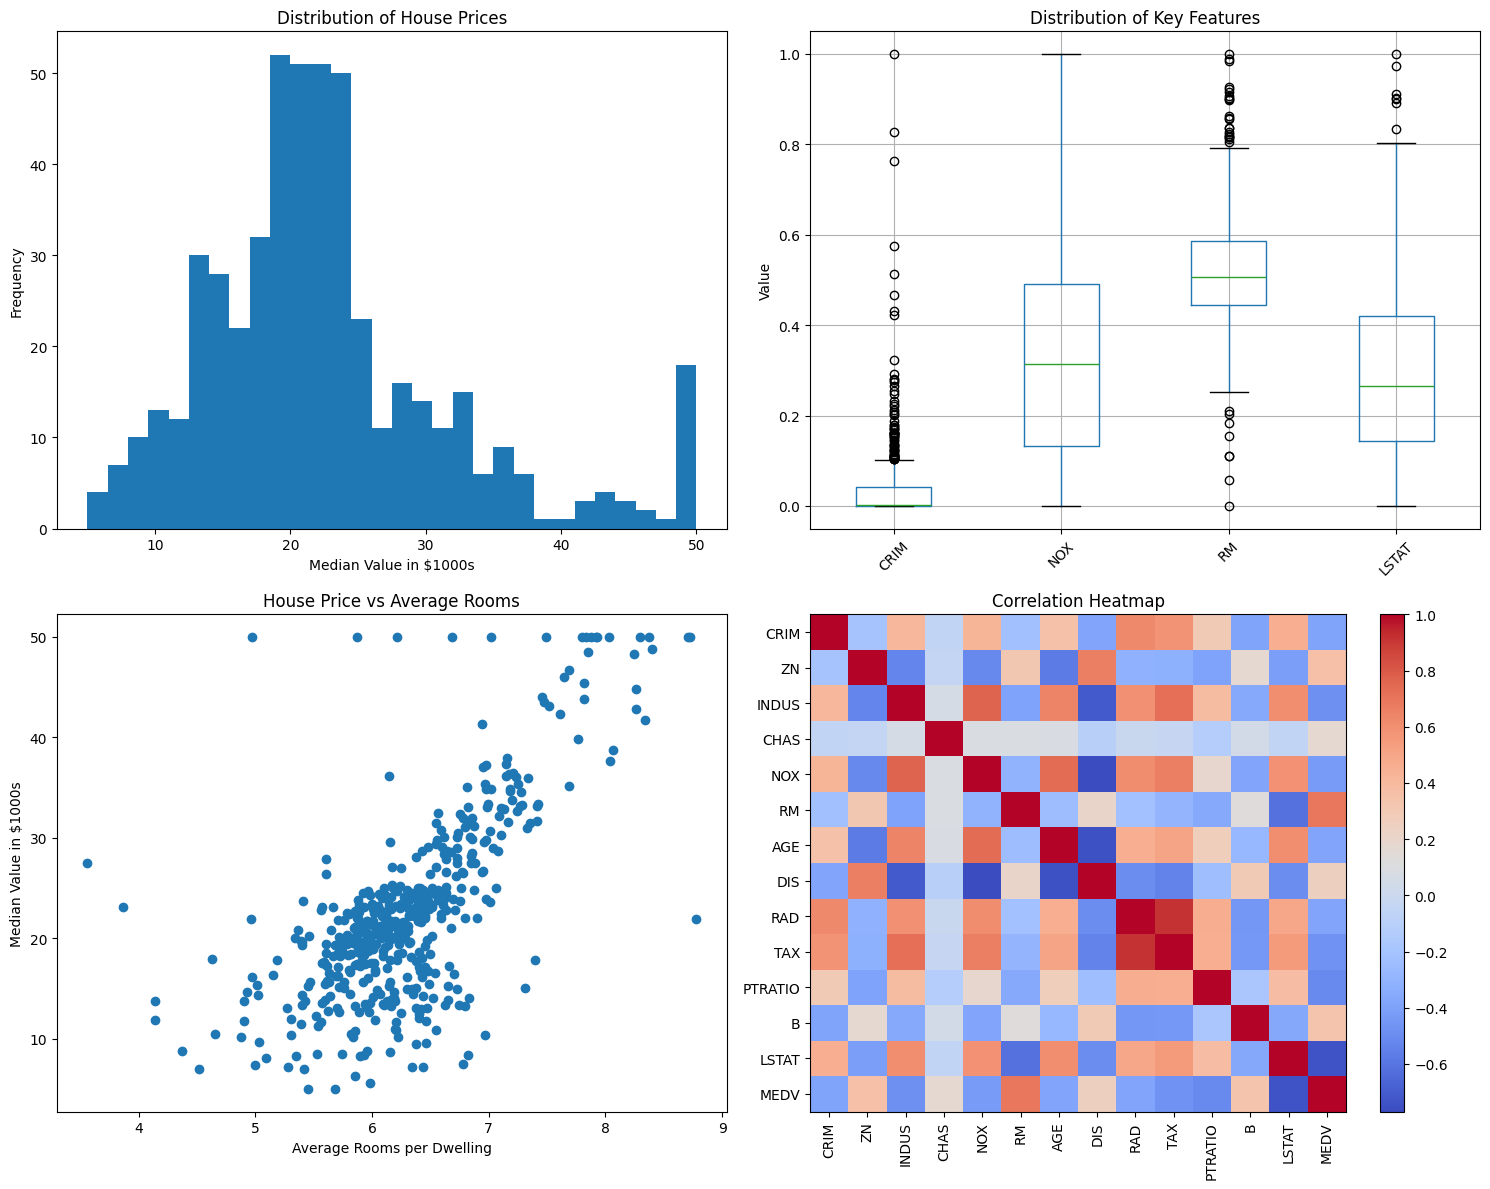


Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of target variable (MEDV)
axes[0,0].hist(data['MEDV'], bins=30)
axes[0,0].set_title('Distribution of House Prices')
axes[0,0].set_xlabel('Median Value in $1000s')
axes[0,0].set_ylabel('Frequency')

# Box plot of key features that need normalization
data_normalized[['CRIM', 'NOX', 'RM', 'LSTAT']].boxplot(ax=axes[0,1])
axes[0,1].set_title('Distribution of Key Features')
axes[0,1].set_ylabel('Value')
axes[0,1].tick_params(axis='x', rotation=45)

# Scatter plot of RM vs MEDV (often a strong predictor)
axes[1,0].scatter(data['RM'], data['MEDV'])
axes[1,0].set_title('House Price vs Average Rooms')
axes[1,0].set_xlabel('Average Rooms per Dwelling')
axes[1,0].set_ylabel('Median Value in $1000s')

# Correlation heatmap of numerical features
correlation_matrix = data.corr()
im = axes[1,1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1,1].set_title('Correlation Heatmap')
plt.colorbar(im, ax=axes[1,1])

# Add feature names to correlation heatmap
feature_names = data.columns
axes[1,1].set_xticks(range(len(feature_names)))
axes[1,1].set_yticks(range(len(feature_names)))
axes[1,1].set_xticklabels(feature_names, rotation=90)
axes[1,1].set_yticklabels(feature_names)

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


In [12]:
#combine similar features (RAD, TAX)
# Combine RAD (accessibility to radial highways) and TAX (property tax rate)
# These features are related to location and municipal characteristics
# We'll create a new feature that captures their combined effect
data_combined = data_normalized.copy()
data_combined['Location_Tax_Index'] = (data_combined['RAD'] * data_combined['TAX']) / (data_combined['RAD'].max() * data_combined['TAX'].max())

# Print correlation of new feature with target variable
print("\nCorrelation between Location_Tax_Index and MEDV:", 
      data_combined['Location_Tax_Index'].corr(data_combined['MEDV']).round(3))

# Display first few rows of new feature
print("\nFirst few values of Location_Tax_Index:")
print(data_combined['Location_Tax_Index'].head())



Correlation between Location_Tax_Index and MEDV: -0.406

First few values of Location_Tax_Index:
0    0.000000
1    0.004564
2    0.004564
3    0.005808
4    0.005808
Name: Location_Tax_Index, dtype: float64


In [13]:

data_shuffled = data_combined.sample(frac=1, random_state=42)

# Shuffle the data and split into features (X) and target (y)
data = data_shuffled.drop('MEDV', axis=1)
labels = data_shuffled['MEDV']

# Split data into training and testing sets with shuffling
train_data, test_data = data.iloc[:int(len(data)*0.8)], data.iloc[int(len(data)*0.8):]
train_labels, test_labels = labels.iloc[:int(len(labels)*0.8)], labels.iloc[int(len(labels)*0.8):]

# Print shapes to verify split
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)




Training set shape: (404, 14)
Testing set shape: (102, 14)


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Basic linear regression
linear_model = LinearRegression()

# Regularized versions
ridge_model = Ridge(alpha=1.0)  # L2 regularization
lasso_model = Lasso(alpha=1.0)  # L1 regularization
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Combination of L1 and L2

# Train the models
linear_model.fit(train_data, train_labels)
ridge_model.fit(train_data, train_labels)
lasso_model.fit(train_data, train_labels)
elastic_model.fit(train_data, train_labels)

# Evaluate the models
linear_score = linear_model.score(test_data, test_labels)
ridge_score = ridge_model.score(test_data, test_labels)
lasso_score = lasso_model.score(test_data, test_labels)
elastic_score = elastic_model.score(test_data, test_labels)

print("Linear Regression R^2 Score:", linear_score)
print("Ridge Regression R^2 Score:", ridge_score)
print("Lasso Regression R^2 Score:", lasso_score)
print("ElasticNet Regression R^2 Score:", elastic_score)


Linear Regression R^2 Score: 0.6862087872132305
Ridge Regression R^2 Score: 0.6858379469210499
Lasso Regression R^2 Score: 0.24774803193849215
ElasticNet Regression R^2 Score: 0.158888366133776


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100)

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100)

# LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100)

#train the models
dt_model.fit(train_data, train_labels)
rf_model.fit(train_data, train_labels)
gb_model.fit(train_data, train_labels)
xgb_model.fit(train_data, train_labels)
lgb_model.fit(train_data, train_labels)

#evaluate the models
dt_score = dt_model.score(test_data, test_labels)
rf_score = rf_model.score(test_data, test_labels)
gb_score = gb_model.score(test_data, test_labels)
xgb_score = xgb_model.score(test_data, test_labels)
lgb_score = lgb_model.score(test_data, test_labels)

print("Decision Tree R^2 Score:", dt_score)
print("Random Forest R^2 Score:", rf_score)
print("Gradient Boosting R^2 Score:", gb_score)
print("XGBoost R^2 Score:", xgb_score)
print("LightGBM R^2 Score:", lgb_score)






[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 14
[LightGBM] [Info] Start training from score 22.505693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [17]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

model = Sequential([
    # Input layer - specify shape as (number_of_features,)
    Input(shape=(14,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model
history = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the model
scores = model.evaluate(test_data, test_labels, verbose=0)
print(f'Loss: {scores[0]:.4f}')
print(f'MAE: {scores[1]:.4f}')
print(scores)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 554.5771 - mae: 21.8015 - val_loss: 616.9267 - val_mae: 22.6937
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 526.7850 - mae: 21.0672 - val_loss: 586.0341 - val_mae: 21.9629
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 498.0249 - mae: 20.2764 - val_loss: 539.4523 - val_mae: 20.8044
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 462.7084 - mae: 19.2354 - val_loss: 476.9410 - val_mae: 19.1129
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 376.8463 - mae: 17.0969 - val_loss: 397.7376 - val_mae: 16.7063
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 318.8676 - mae: 15.0537 - val_loss: 310.7472 - val_mae: 14.0693
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 235.5059 - mae: 12.3027 - val_loss: 233.5460 - val_mae: 11.8881
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 199.0295 - mae: 11.3040 - val_loss: 186.1913 - val_mae: 10.4332
Epoch 9/100
11/

Only off by approx. 3000 for each house - Mean absolute error mean(| actual -  predicted |)

Loss (MSE) - average squared error is approx 22k per ((actual - predicted)²).mean()

 MAE is usually more useful for understanding real-world performance, while MSE is better for training (because its derivatives help the model learn from larger errors more aggressively).

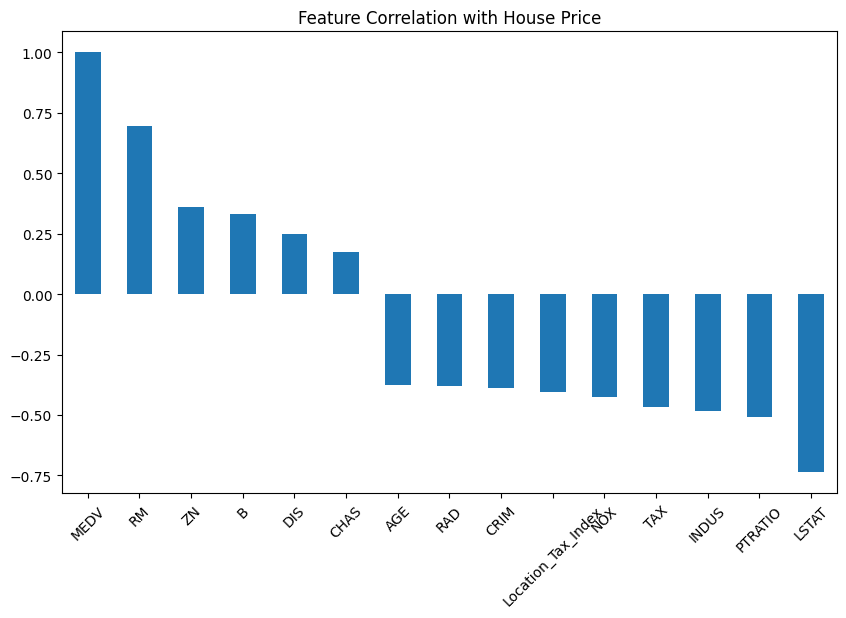

In [19]:
# Using correlation with target variable
correlation_with_target = data_shuffled.corr()['MEDV'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Feature Correlation with House Price')
plt.xticks(rotation=45)
plt.show()

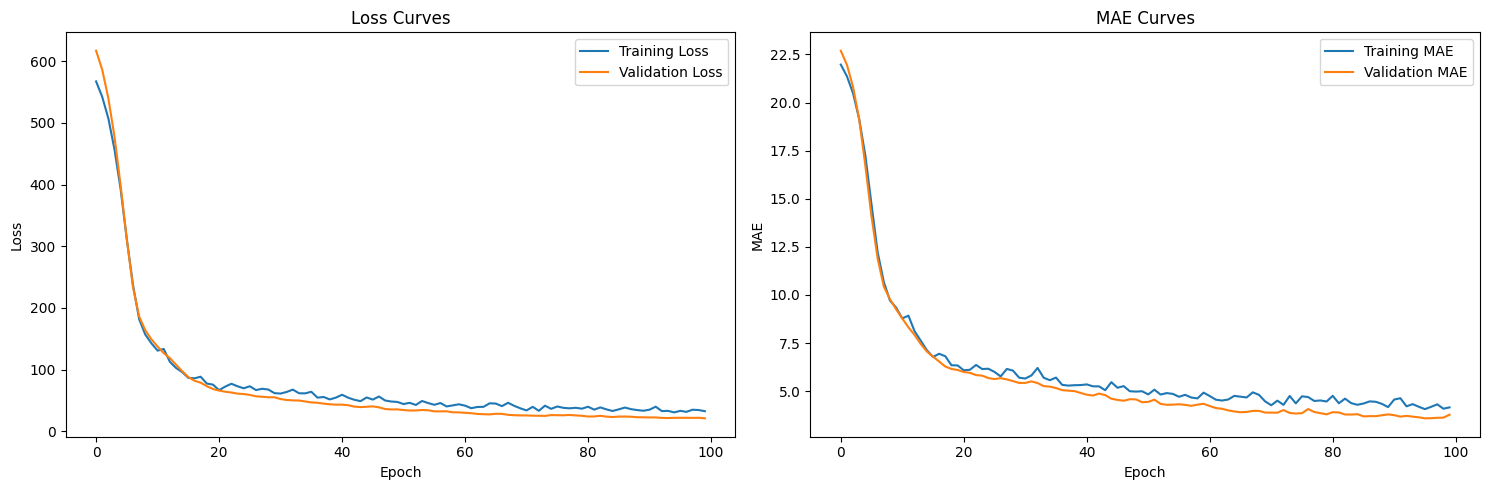

In [22]:
def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss curves
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss Curves')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # MAE curves
    ax2.plot(history.history['mae'], label='Training MAE')
    ax2.plot(history.history['val_mae'], label='Validation MAE')
    ax2.set_title('MAE Curves')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


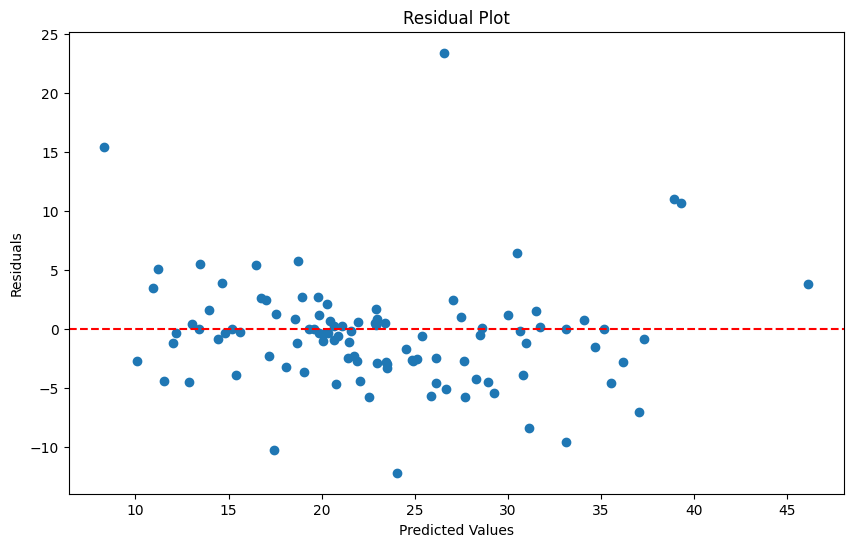

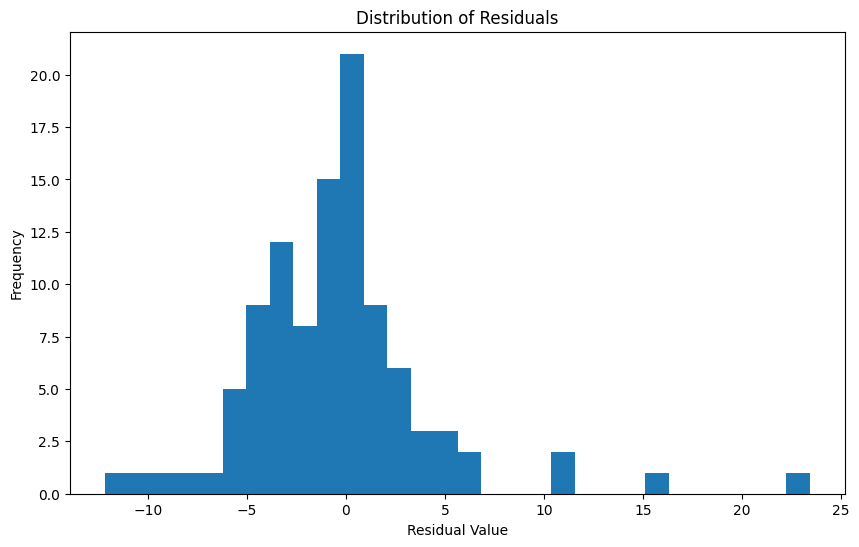

In [23]:
def plot_residuals(model, X_test, y_test):
    predictions = model.predict(X_test)
    residuals = y_test - predictions.flatten()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()
    
    # Residual distribution
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30)
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

plot_residuals(model, test_data, test_labels)

In [27]:
from sklearn.model_selection import KFold
import numpy as np

def cross_validate_model(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mae_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model = Sequential([
            Input(shape=(14,)),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(1)
        ])
        
        model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
        model.fit(train_data, train_labels, epochs=100, batch_size=32, verbose=0)
        
        _, mae = model.evaluate(test_data, test_labels, verbose=0)
        mae_scores.append(mae)
        print(f'Fold {fold+1} MAE: {mae:.4f}')
    
    print(f'\nAverage MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}')

# Convert data to numpy arrays first
X = data_shuffled.values
y = data_shuffled['MEDV'].values
cross_validate_model(X, y)

Fold 1 MAE: 2.9535
Fold 2 MAE: 2.8713
Fold 3 MAE: 2.8167
Fold 4 MAE: 2.8611
Fold 5 MAE: 2.8655

Average MAE: 2.8736 ± 0.0444


In [29]:
# Create interaction terms
data_shuffled['RM_LSTAT'] = data_shuffled['RM'] * data_shuffled['LSTAT']  # Rooms × Lower status
data_shuffled['PRICE_PER_ROOM'] = data_shuffled['MEDV'] / data_shuffled['RM']
data_shuffled['AGE_NOX'] = data_shuffled['AGE'] * data_shuffled['NOX']    # Age × Pollution

# Create polynomial features for important variables
data_shuffled['RM_SQ'] = data_shuffled['RM'] ** 2
data_shuffled['LSTAT_SQ'] = data_shuffled['LSTAT'] ** 2